# IMPORT NECESSARY LIBRARIES

In [25]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
from tabulate import tabulate

In [26]:
df1=pd.read_csv("IPL_Matches_2008_2022.csv")
df1.shape

(950, 20)

In [27]:
df1

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


# CHECK BASIC INFORMATION OF DATASET 

In [28]:
df1.describe()


,ID,Margin
count,9.500000e+02,932.000000
mean,8.304852e+05,17.056867
std,3.375678e+05,21.633109
min,3.359820e+05,1.000000
25%,5.012612e+05,6.000000
50%,8.297380e+05,8.000000
75%,1.175372e+06,19.000000
max,1.312200e+06,146.000000


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

# FIND AND DROP NULL OR NaN VALUES

In [30]:
#columns with null values
nan_values = df1.isna()
nan_columns = nan_values.any()

columns_with_nan = df1.columns[nan_columns].tolist()
print(columns_with_nan)

['City', 'SuperOver', 'WinningTeam', 'Margin', 'method', 'Player_of_Match']


In [31]:
df1.drop(columns=['method','Margin'],inplace=True)#entire method column is empty

In [32]:
df1.dropna(axis=0,inplace=True)#dropping null values

# REMOVE DATA INCONSISTENCIES

In [33]:
df1['WinningTeam'] = df1['WinningTeam'].replace('Gujarat Lions', 'Gujarat Titans')
df1['WinningTeam'] = df1['WinningTeam'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
df1['WinningTeam'] = df1['WinningTeam'].replace('Pune Warriors', 'Rising Pune Supergiants')
df1['WinningTeam'] = df1['WinningTeam'].replace('Delhi Capitals', 'Delhi Daredevils')
df1['WinningTeam'] = df1['WinningTeam'].replace('Punjab Kings', 'Kings XI Punjab')

In [34]:
df1['Season'] = df1['Season'].replace('2009/10', '2010')
df1['Season'] = df1['Season'].replace('2020/21', '2021')
df1['Season'] = df1['Season'].replace('2007/08', '2008')


In [35]:
df1['Team1'] = df1['Team1'].replace('Gujarat Lions', 'Gujarat Titans')
df1['Team1'] = df1['Team1'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
df1['Team1'] = df1['Team1'].replace('Pune Warriors', 'Rising Pune Supergiants')
df1['Team1'] = df1['Team1'].replace('Delhi Capitals', 'Delhi Daredevils')
df1['Team1'] = df1['Team1'].replace('Punjab Kings', 'Kings XI Punjab')

In [36]:
df1['Team2'] = df1['Team2'].replace('Gujarat Lions', 'Gujarat Titans')
df1['Team2'] = df1['Team2'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
df1['Team2'] = df1['Team2'].replace('Pune Warriors', 'Rising Pune Supergiants')
df1['Team2'] = df1['Team2'].replace('Delhi Capitals', 'Delhi Daredevils')
df1['Team2'] = df1['Team2'].replace('Punjab Kings', 'Kings XI Punjab')

In [37]:
df1['Venue'] = df1['Venue'].replace('Eden Gardens', 'Eden Gardens, Kolkata')
df1['Venue'] = df1['Venue'].replace('Wankhede Stadium', 'Wankhede Stadium, Mumbai')
df1['Venue'] = df1['Venue'].replace('MA Chidambaram Stadium', 'MA Chidambaram Stadium, Chennai')
df1['Venue'] = df1['Venue'].replace('MA Chidambaram Stadium, Chepauk, Chennai', 'MA Chidambaram Stadium, Chennai')
df1['Venue'] = df1['Venue'].replace('M Chinnaswamy Stadium', 'M.Chinnaswamy Stadium')
df1['Venue'] = df1['Venue'].replace('Dr DY Patil Sports Academy', 'Dr DY Patil Sports Academy, Mumbai')
df1['Venue'] = df1['Venue'].replace('Maharashtra Cricket Association Stadium', 'Maharashtra Cricket Association Stadium, Pune')
df1['Venue'] = df1['Venue'].replace('Punjab Cricket Association IS Bindra Stadium', 'Punjab Cricket Association IS Bindra Stadium, Mohali')
df1['Venue'] = df1['Venue'].replace('Rajiv Gandhi International Stadium', 'Rajiv Gandhi International Stadium, Uppal')
df1['Venue'] = df1['Venue'].replace('Brabourne Stadium', 'Brabourne Stadium, Mumbai')


# COUNT NUMBER OF TEAMS AND THEIR WINS

In [38]:
teams=df1.WinningTeam.value_counts().sort_values(ascending=False)
teams

WinningTeam
Mumbai Indians                 126
Chennai Super Kings            114
Kolkata Knight Riders          111
Royal Challengers Bangalore    102
Delhi Daredevils                94
Rajasthan Royals                93
Kings XI Punjab                 92
Sunrisers Hyderabad             67
Deccan Chargers                 29
Rising Pune Supergiants         27
Gujarat Titans                  25
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Name: count, dtype: int64

C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


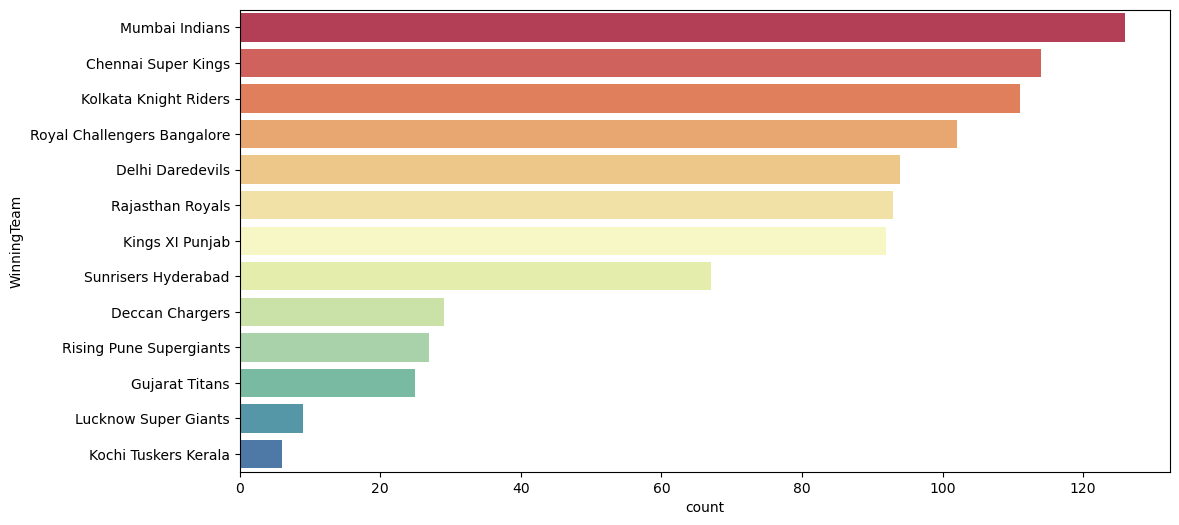

In [139]:
plt.figure(figsize=(12,6))
data = df1.WinningTeam.value_counts()
sns.barplot(y = data.index, x = data, orient='h',palette="Spectral")
plt.show()

MUMBAI INDIANS WON MAXIMUM MATCHES

# CALCULATING TEAM STATISTICS

In [40]:
# Create a DataFrame for captain statistics
captain_stats = pd.DataFrame()

# Calculate the number of times each team reached the Top 4
top_4_counts = df1.groupby('Team1')['MatchNumber'].count() + df1.groupby('Team2')['MatchNumber'].count()
captain_stats['Top4_Count'] = top_4_counts

# Calculate the total number of matches won and total matches played under each captain
matches_played = df1.groupby('Team1')['MatchNumber'].count() + df1.groupby('Team2')['MatchNumber'].count()
matches_won = df1[df1['WinningTeam'].notnull()].groupby('WinningTeam')['MatchNumber'].count()
captain_stats['Matches_Played'] = matches_played
captain_stats['Matches_Won'] = matches_won

# Calculate individual performance (Matches Won / Matches Played)
captain_stats['Individual_Performance'] = captain_stats['Matches_Won'] / captain_stats['Matches_Played']

# Count the number of times each captain won the IPL trophy
trophy_counts = df1[df1['WinningTeam'].notnull()].groupby('WinningTeam')['MatchNumber'].count()
captain_stats['Trophy_Count'] = trophy_counts

# Print the captain statistics
print(captain_stats)


                             Top4_Count  Matches_Played  Matches_Won  \
Team1                                                                  
Chennai Super Kings                 195             195          114   
Deccan Chargers                      75              75           29   
Delhi Daredevils                    206             206           94   
Gujarat Titans                       46              46           25   
Kings XI Punjab                     205             205           92   
Kochi Tuskers Kerala                 14              14            6   
Kolkata Knight Riders               215             215          111   
Lucknow Super Giants                 15              15            9   
Mumbai Indians                      219             219          126   
Rajasthan Royals                    179             179           93   
Rising Pune Supergiants              75              75           27   
Royal Challengers Bangalore         209             209         

LUCKNOW SUPERGIANTS ARE A TEAM TO RECKON WITH SINCE THEIR INDIVIDUAL PERFORMANCE HAS MAXIMUM IMPACT OF 60%

# TOP 5 CITIES WITH MOST NUMBER OF MATCHES HOSTED

In [41]:
df1.City.value_counts().sort_values(ascending=False)

City
Mumbai            159
Kolkata            79
Delhi              77
Chennai            67
Hyderabad          64
Bangalore          63
Chandigarh         56
Pune               51
Jaipur             47
Abu Dhabi          37
Ahmedabad          19
Durban             15
Bengaluru          14
Visakhapatnam      13
Dubai              13
Centurion          12
Sharjah            10
Rajkot             10
Dharamsala          9
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Port Elizabeth      7
Cape Town           7
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: count, dtype: int64

In [42]:
g1=df1.City.value_counts().sort_values(ascending=False).head()
g1

City
Mumbai       159
Kolkata       79
Delhi         77
Chennai       67
Hyderabad     64
Name: count, dtype: int64

C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'TOP 5 CITIES HOSTING MATCHES'}, xlabel='City', ylabel='count'>

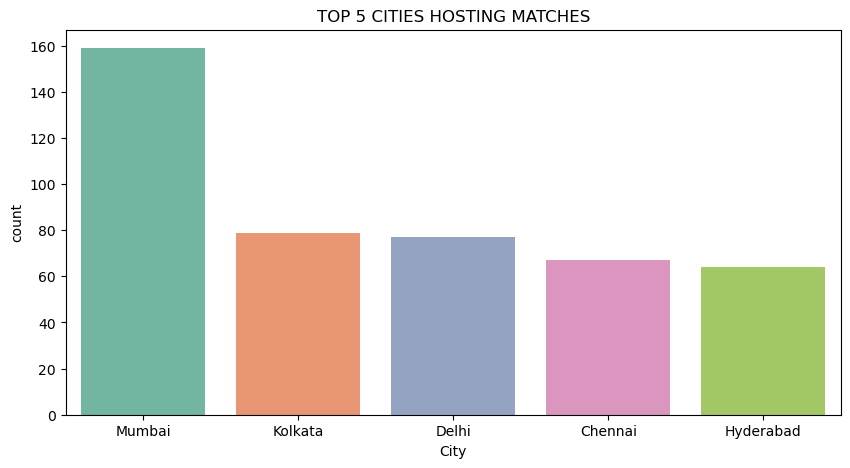

In [43]:
plt.figure(figsize=(10,5))
plt.title('TOP 5 CITIES HOSTING MATCHES')
plt.xlabel('TOTAL')
sns.barplot(x=g1.index,y=g1,palette='Set2')

MUMBAI INDIANS WON THE MOST MATCHES WHILE MUMBAI HOSTED THE MOST. THIS CAN INDICATE THAT PLAYING IN HOME GROUND HAS A POSITIVE EFFECT

# TOP VENUES FOR MATCH

In [44]:
df1.Venue.value_counts().sort_values(ascending=False)

Venue
Wankhede Stadium, Mumbai                                104
Eden Gardens, Kolkata                                    79
M.Chinnaswamy Stadium                                    77
Rajiv Gandhi International Stadium, Uppal                64
Feroz Shah Kotla                                         59
MA Chidambaram Stadium, Chepauk                          48
Sawai Mansingh Stadium                                   47
Dr DY Patil Sports Academy, Mumbai                       37
Punjab Cricket Association Stadium, Mohali               35
Maharashtra Cricket Association Stadium, Pune            35
Sheikh Zayed Stadium                                     29
Brabourne Stadium, Mumbai                                27
Punjab Cricket Association IS Bindra Stadium, Mohali     21
MA Chidambaram Stadium, Chennai                          19
Subrata Roy Sahara Stadium                               16
Kingsmead                                                15
Arun Jaitley Stadium              

In [45]:
g2=df1.Venue.value_counts().sort_values(ascending=False).head()
g2

Venue
Wankhede Stadium, Mumbai                     104
Eden Gardens, Kolkata                         79
M.Chinnaswamy Stadium                         77
Rajiv Gandhi International Stadium, Uppal     64
Feroz Shah Kotla                              59
Name: count, dtype: int64

C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


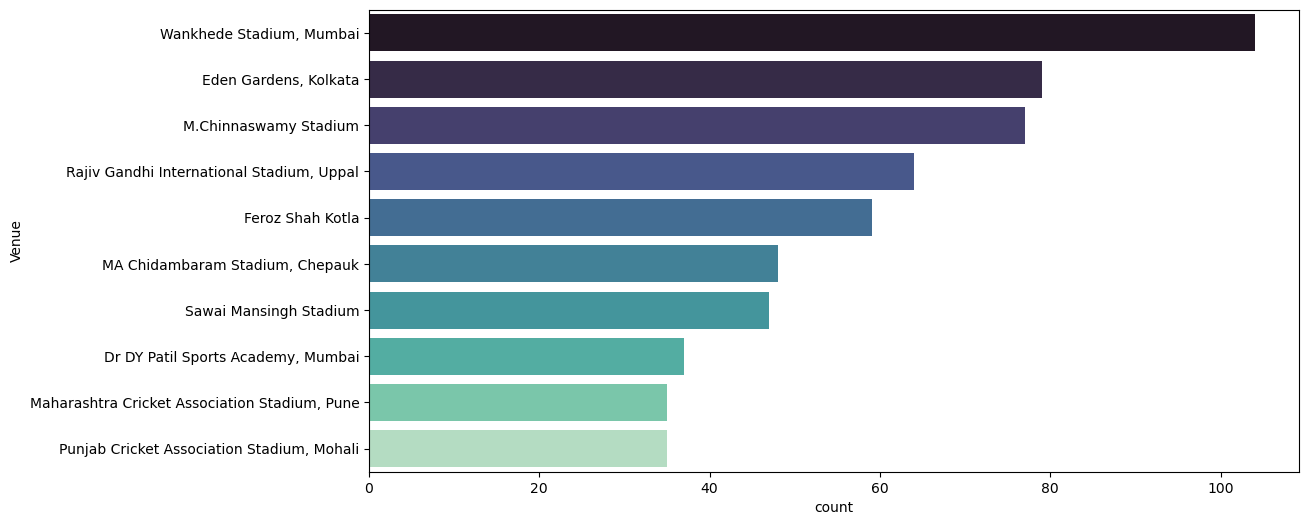

In [46]:
plt.figure(figsize=(12,6))
data = df1.Venue.value_counts().head(10)
sns.barplot(y = data.index, x = data, orient='h',palette="mako")
plt.show()

# MATCHES WON BY ANALYSIS

WonBy
Wickets      485
Runs         399
SuperOver     11
Name: count, dtype: int64


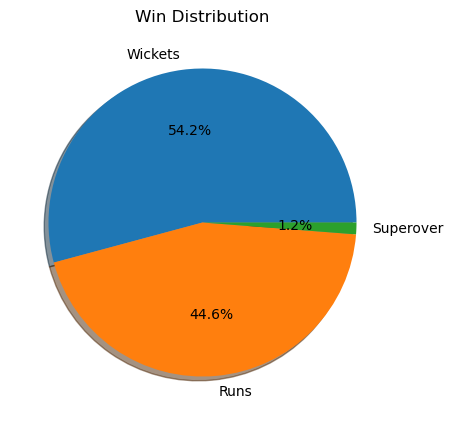

In [47]:
plt.figure(figsize=(5,5))
plt.title('Win Distribution')
y=df1.WonBy.value_counts()
print(y)
mylabels=['Wickets','Runs','Superover']
plt.pie(y,labels=mylabels,shadow=True,autopct='%1.1f%%');

The team batting second successfully chased the target runs while losing as few wickets as possible( 54.9%)

# TOSS DECISION ANALYSIS

TossDecision
field    566
bat      329
Name: count, dtype: int64


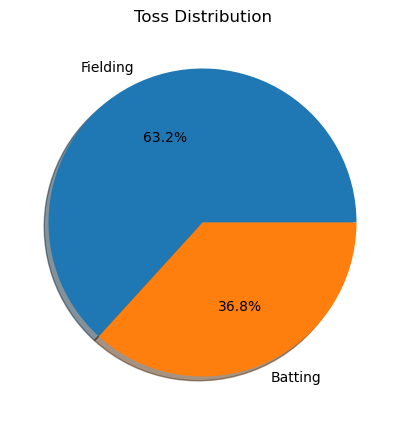

In [48]:
plt.figure(figsize=(5,5))
plt.title('Toss Distribution')
y=df1.TossDecision.value_counts()
print(y)
mylabels=['Fielding','Batting']
plt.pie(y,labels=mylabels,shadow=True,autopct='%1.1f%%');

TEAMS CHOSE FIELDING OVER BATTING WHEN WINNING THE TOSS (63.3%)

C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

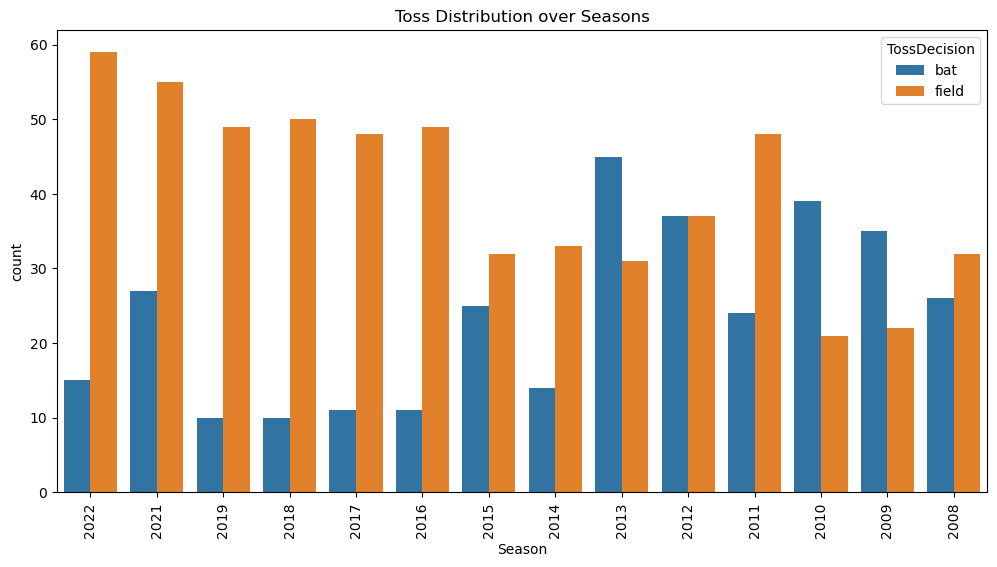

In [49]:
plt.figure(figsize=(12,6))
plt.title('Toss Distribution over Seasons')
sns.countplot(x='Season', hue='TossDecision', data=df1)
plt.xticks(rotation='vertical')
plt.show()

# TOSS WINNER ANALYSIS

In [50]:
g3=df1.TossWinner.value_counts().sort_values(ascending=False)
g3

TossWinner
Mumbai Indians                 115
Kolkata Knight Riders          112
Chennai Super Kings            104
Royal Challengers Bangalore     95
Rajasthan Royals                91
Kings XI Punjab                 80
Delhi Daredevils                79
Sunrisers Hyderabad             63
Deccan Chargers                 43
Delhi Capitals                  31
Pune Warriors                   20
Gujarat Lions                   15
Gujarat Titans                  10
Punjab Kings                     9
Kochi Tuskers Kerala             8
Lucknow Super Giants             7
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64

C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'TOP 5 TOSS WINNERS'}, xlabel='TossWinner', ylabel='count'>

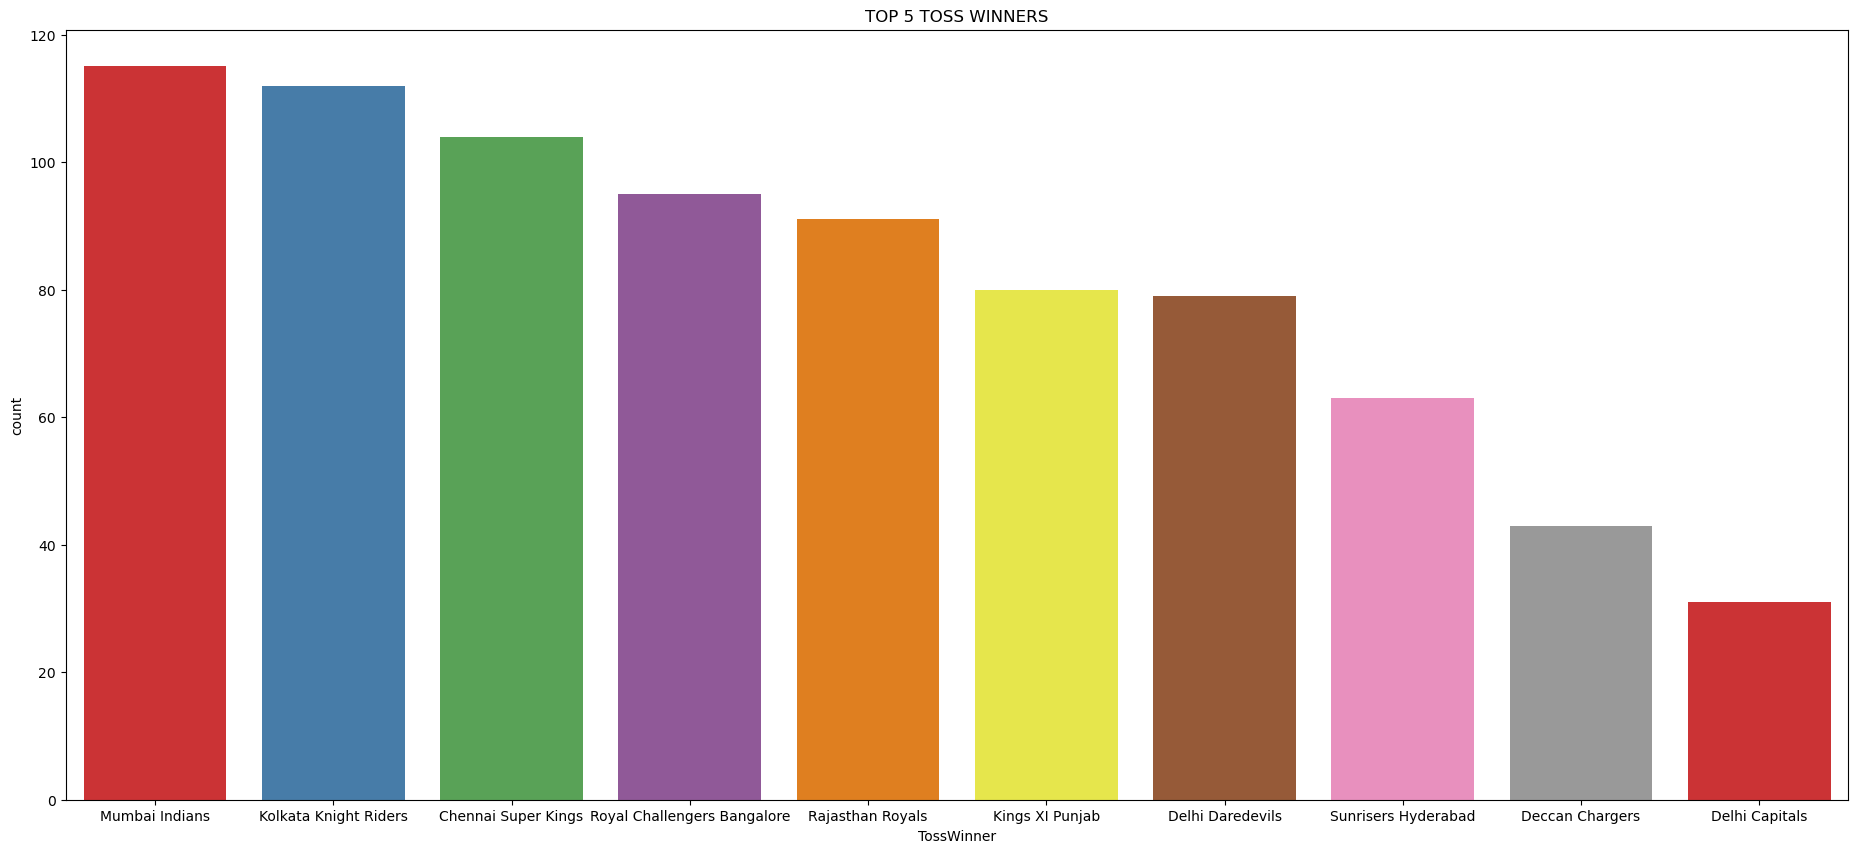

In [51]:
g3=g3.head(10)
plt.figure(figsize=(23,10))
plt.title('TOP 5 TOSS WINNERS')
plt.xlabel('TOTAL')
sns.barplot(x=g3.index,y=g3,palette='Set1')

MUMBAI INDIANS HAD A LOT OF FAVOUR. MOST MATCHES WERE PLAYED IN THE HOME GROUND. THEY WON MOST TOSSES, PLAYED MOST MATCHES AND EVENTUALLY WON THE MOST MATCHES.

# SEASONAL TREND IN NUMBER OF MATCHES PLAYED

In [52]:
g4=df1.Season.value_counts()
g4 = g4.sort_index()
g4

Season
2008    58
2009    57
2010    60
2011    72
2012    74
2013    76
2014    47
2015    57
2016    60
2017    59
2018    60
2019    59
2021    82
2022    74
Name: count, dtype: int64

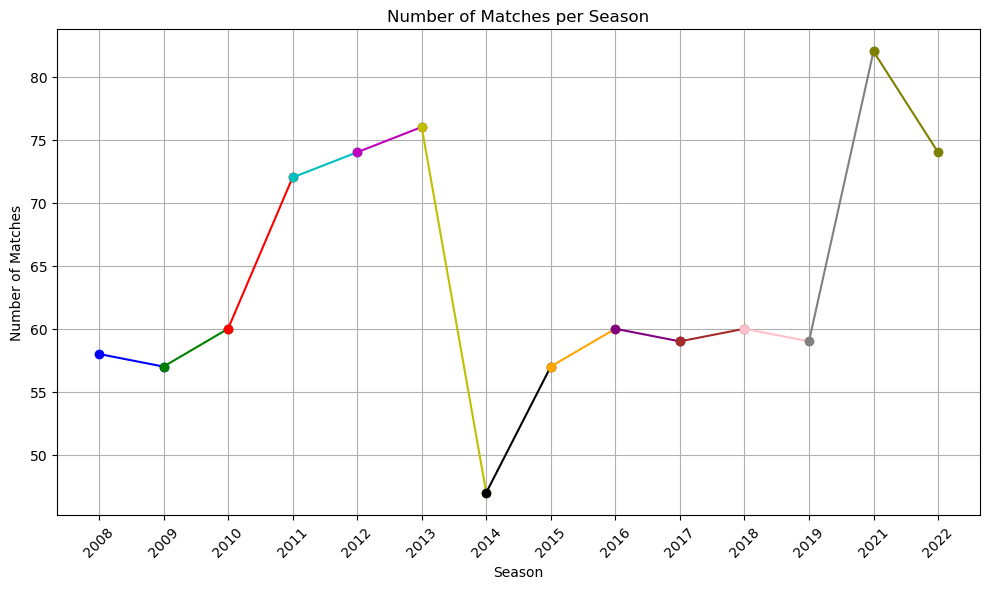

In [53]:
seasons = g4.index
match_counts = g4.values

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive']

# Create a line plot with segmented colors
plt.figure(figsize=(10, 6))
for i in range(len(seasons) - 1):
    plt.plot(seasons[i:i+2], match_counts[i:i+2], marker='o', linestyle='-', color=colors[i], label=f'Segment {i+1}')

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.title('Number of Matches per Season')

# Customize the x-axis labels for better readability (optional)
plt.xticks(rotation=45)
# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()





2021 HAD THE HIGHEST MATCHES CONDUCTED

# PLAYER OF THE MATCH ANALYSIS

In [54]:
g4=df1.Player_of_Match.value_counts().sort_values(ascending=False)
g4=g4.head(10)

C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'TOP 10 PLAYERS TO WIN PLAYER OF THE MATCH'}, xlabel='Player_of_Match', ylabel='count'>

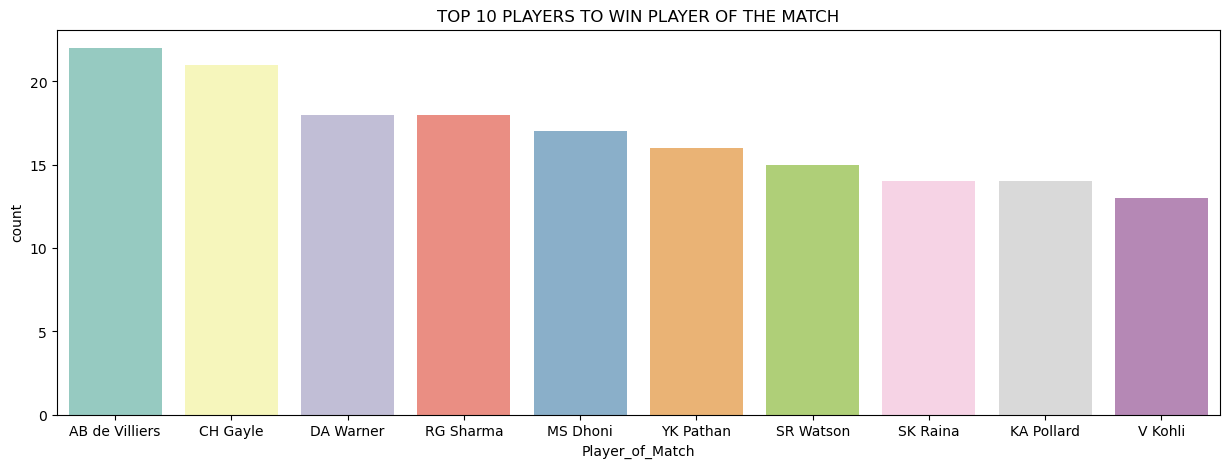

In [55]:
plt.figure(figsize=(15,5))
plt.title('TOP 10 PLAYERS TO WIN PLAYER OF THE MATCH')
sns.barplot(x=g4.index,y=g4,palette='Set3')

# SEASON WISE WINNERS 

In [56]:
temp = df1[(df1['MatchNumber'] == 'Final')]

In [57]:
df2=pd.DataFrame(temp['WinningTeam'])
df2['Year']=temp['Season']

In [58]:
df2

,WinningTeam,Year
0,Gujarat Titans,2022
74,Chennai Super Kings,2021
194,Mumbai Indians,2019
254,Chennai Super Kings,2018
314,Mumbai Indians,2017
373,Sunrisers Hyderabad,2016
433,Mumbai Indians,2015
492,Kolkata Knight Riders,2014
552,Mumbai Indians,2013
628,Kolkata Knight Riders,2012


# LOADING AND MERGING BALL-BY-BALL MATCH STATISTICS

In [59]:
df2=pd.read_csv("IPL_Ball_by_Ball_2008_2022.csv")
df2

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [60]:
df2.drop(columns=['innings','overs','extra_type','kind','fielders_involved','ballnumber'],inplace=True)#entire method column is empty

In [61]:
df=df1.merge(df2,how="left", on="ID")

In [62]:
df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,batter,bowler,non-striker,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,BattingTeam
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,NaN,Rajasthan Royals
1,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,YBK Jaiswal,Mohammed Shami,JC Buttler,0,1,1,0,0,NaN,Rajasthan Royals
2,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,JC Buttler,Mohammed Shami,YBK Jaiswal,1,0,1,0,0,NaN,Rajasthan Royals
3,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,NaN,Rajasthan Royals
4,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213180,335982,Bangalore,2008-04-18,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,M.Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,P Kumar,I Sharma,SB Joshi,0,1,1,0,0,NaN,Royal Challengers Bangalore
213181,335982,Bangalore,2008-04-18,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,M.Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,SB Joshi,I Sharma,P Kumar,1,0,1,0,0,NaN,Royal Challengers Bangalore
213182,335982,Bangalore,2008-04-18,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,M.Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,P Kumar,I Sharma,SB Joshi,0,0,0,0,0,NaN,Royal Challengers Bangalore
213183,335982,Bangalore,2008-04-18,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,M.Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,SB Joshi,LR Shukla,P Kumar,0,1,1,0,0,NaN,Royal Challengers Bangalore


# TOTAL BATSMEN

In [67]:
len(df2['batter'].unique())

605

# TOTAL BOWLERS

In [68]:
len(df2['bowler'].unique())

472

# TOTAL NON-STRIKERS

In [90]:
len(df2['non-striker'].unique())

595

# INTERSECTIONS BETWEEN PLAYERS

In [91]:
s1=set(df2['batter'])
s2=set(df2['bowler'])
s3=set(df2['non-striker'])

In [92]:
s1.intersection(s2)#batters and bowlers

{'A Ashish Reddy',
 'A Badoni',
 'A Chandila',
 'A Choudhary',
 'A Dananjaya',
 'A Flintoff',
 'A Kumble',
 'A Mishra',
 'A Mithun',
 'A Nehra',
 'A Nortje',
 'A Singh',
 'A Symonds',
 'A Uniyal',
 'A Zampa',
 'AA Chavan',
 'AA Jhunjhunwala',
 'AA Noffke',
 'AB Agarkar',
 'AB Dinda',
 'AB McDonald',
 'AC Gilchrist',
 'AC Thomas',
 'AC Voges',
 'AD Mascarenhas',
 'AD Mathews',
 'AD Russell',
 'AF Milne',
 'AG Murtaza',
 'AJ Finch',
 'AJ Tye',
 'AK Markram',
 'AL Menaria',
 'AM Nayar',
 'AM Rahane',
 'AN Ahmed',
 'AP Dole',
 'AR Patel',
 'AS Joseph',
 'AS Rajpoot',
 'AS Raut',
 'AS Roy',
 'AUK Pathan',
 'Abdul Samad',
 'Abdur Razzak',
 'Abhishek Sharma',
 'Akash Deep',
 'Aman Hakim Khan',
 'Ankit Sharma',
 'Ankit Soni',
 'Anureet Singh',
 'Arshdeep Singh',
 'Avesh Khan',
 'Azhar Mahmood',
 'B Akhil',
 'B Chipli',
 'B Kumar',
 'B Laughlin',
 'B Lee',
 'B Stanlake',
 'BA Bhatt',
 'BA Stokes',
 'BAW Mendis',
 'BB Sran',
 'BCJ Cutting',
 'BE Hendricks',
 'BJ Hodge',
 'BJ Rohrer',
 'BMAJ Mend

In [94]:
s1.intersection(s3)#batters and non-strikers

{'A Ashish Reddy',
 'A Badoni',
 'A Chandila',
 'A Chopra',
 'A Choudhary',
 'A Dananjaya',
 'A Flintoff',
 'A Kumble',
 'A Manohar',
 'A Mishra',
 'A Mithun',
 'A Mukund',
 'A Nehra',
 'A Nortje',
 'A Singh',
 'A Symonds',
 'A Tomar',
 'A Uniyal',
 'A Zampa',
 'AA Bilakhia',
 'AA Chavan',
 'AA Jhunjhunwala',
 'AA Noffke',
 'AB Agarkar',
 'AB Barath',
 'AB Dinda',
 'AB McDonald',
 'AB de Villiers',
 'AC Blizzard',
 'AC Gilchrist',
 'AC Thomas',
 'AC Voges',
 'AD Hales',
 'AD Mascarenhas',
 'AD Mathews',
 'AD Nath',
 'AD Russell',
 'AF Milne',
 'AG Murtaza',
 'AG Paunikar',
 'AJ Finch',
 'AJ Turner',
 'AJ Tye',
 'AK Markram',
 'AL Menaria',
 'AM Nayar',
 'AM Rahane',
 'AN Ahmed',
 'AN Ghosh',
 'AP Dole',
 'AP Majumdar',
 'AP Tare',
 'AR Bawne',
 'AR Patel',
 'AS Joseph',
 'AS Rajpoot',
 'AS Raut',
 'AS Yadav',
 'AT Carey',
 'AT Rayudu',
 'AUK Pathan',
 'Abdul Samad',
 'Abdur Razzak',
 'Abhishek Sharma',
 'Aman Hakim Khan',
 'Anirudh Singh',
 'Ankit Sharma',
 'Ankit Soni',
 'Anmolpreet S

# VISUALIZING INTERSECTIONS

In [96]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn2_circles

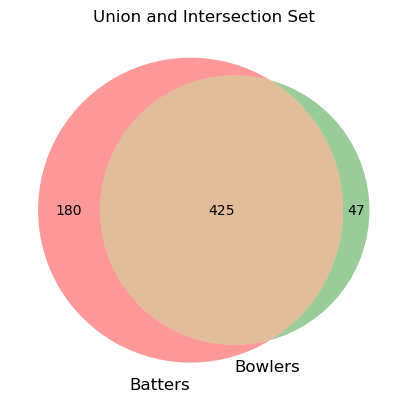

In [101]:
plt.figure(figsize=(5,5))
venn2([s1, s2], set_labels=('Batters', 'Bowlers'))
plt.title("Union and Intersection Set")
plt.show()

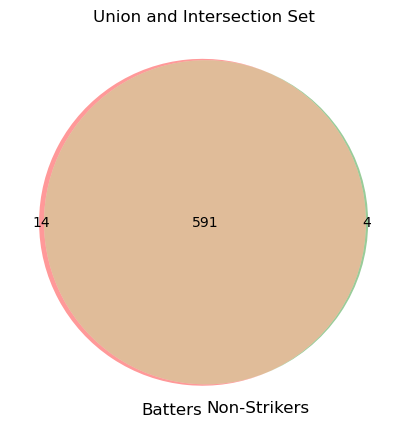

In [102]:
plt.figure(figsize=(5,5))
venn2([s1, s3], set_labels=('Batters', 'Non-Strikers'))
plt.title("Union and Intersection Set")
plt.show()

425 ALL-ROUNDERS PLAYED THE IPL THROUGHOUT THE YEARS WHILE 591 OUT OF 605 BATSMEN WERE NON-STRIKERS

# BATSMEN WHO PLAYED MOST NUMBER OF BALLS 

C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


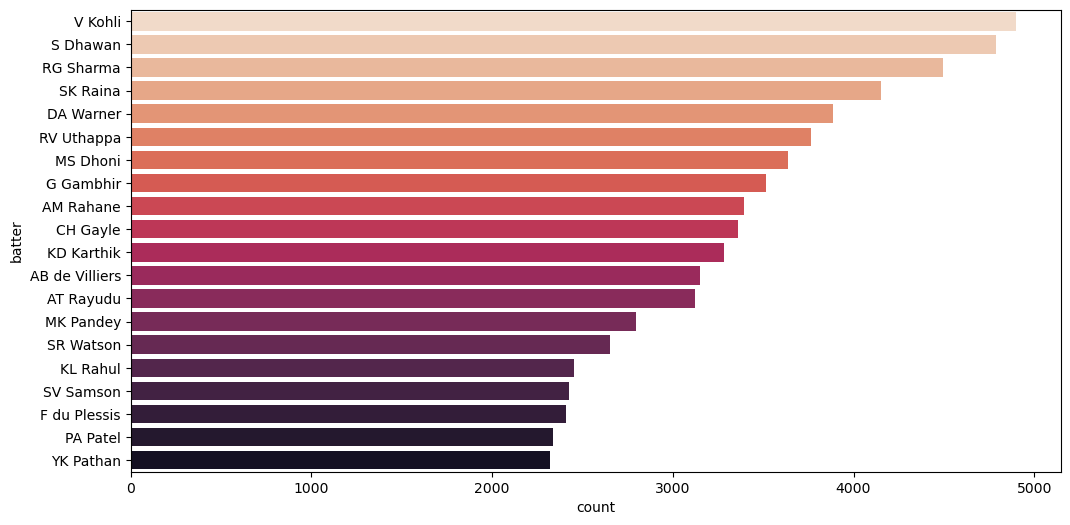

In [119]:
plt.figure(figsize=(12,6))
data = df.batter.value_counts().head(20)
sns.barplot(y = data.index, x = data, orient='h',palette="rocket_r")
plt.show()

# BOWLERS WHO PLAYED MOST OVERS

C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\asmit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


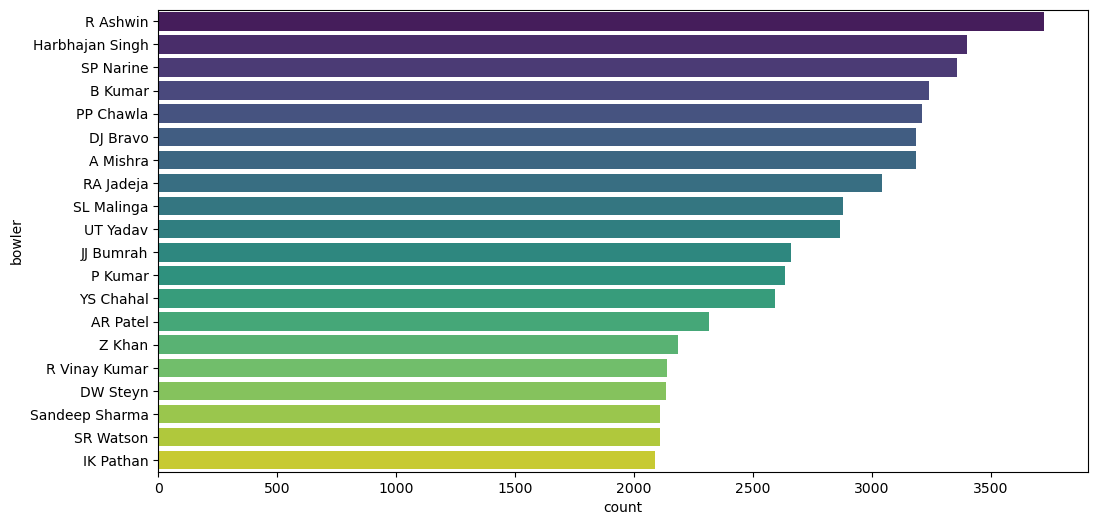

In [120]:
plt.figure(figsize=(12,6))
data = df.bowler.value_counts().head(20)
sns.barplot(y = data.index, x = data, orient='h',palette="viridis")
plt.show()

# ANALYZING YBK JAISWAL'S PERFORMANCE

In [110]:
temp = df[(df['batter'] == 'YBK Jaiswal')]

In [111]:
temp

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,batter,bowler,non-striker,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,BattingTeam
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,NaN,Rajasthan Royals
1,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,YBK Jaiswal,Mohammed Shami,JC Buttler,0,1,1,0,0,NaN,Rajasthan Royals
3,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,NaN,Rajasthan Royals
4,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,NaN,Rajasthan Royals
5,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28108,1254075,Mumbai,2021-04-24,2021,18,Kolkata Knight Riders,Rajasthan Royals,"Wankhede Stadium, Mumbai",Rajasthan Royals,field,...,YBK Jaiswal,CV Varun,SV Samson,4,0,4,0,0,NaN,Rajasthan Royals
28113,1254075,Mumbai,2021-04-24,2021,18,Kolkata Knight Riders,Rajasthan Royals,"Wankhede Stadium, Mumbai",Rajasthan Royals,field,...,YBK Jaiswal,Shivam Mavi,SV Samson,4,0,4,0,0,NaN,Rajasthan Royals
28114,1254075,Mumbai,2021-04-24,2021,18,Kolkata Knight Riders,Rajasthan Royals,"Wankhede Stadium, Mumbai",Rajasthan Royals,field,...,YBK Jaiswal,Shivam Mavi,SV Samson,0,0,0,0,1,YBK Jaiswal,Rajasthan Royals
36060,1216511,Abu Dhabi,2020-10-06,2021,20,Mumbai Indians,Rajasthan Royals,Sheikh Zayed Stadium,Mumbai Indians,bat,...,YBK Jaiswal,TA Boult,JC Buttler,0,0,0,0,0,NaN,Rajasthan Royals


In [121]:
temp['Season'].max()

'2022'

In [122]:
temp['Season'].min()

'2021'

In [128]:
temp['total_run'].sum()

527

In [129]:
temp['extras_run'].sum()

20

In [135]:
temp1 = temp[(temp['Season'] == '2022')]

In [136]:
temp2=temp[(temp['Season'] == '2021')]

In [137]:
temp1['total_run'].sum()

272

In [138]:
temp2['total_run'].sum()

255

In [148]:
strike_rate = temp['total_run'].sum() / len(temp['total_run']) * 100

strike_rate1 = temp['total_run'] / len(temp['total_run']) * 100
strike_rate

143.20652173913044

In [152]:
temp['player_out'].value_counts()

player_out
YBK Jaiswal    21
Name: count, dtype: int64

# SUMMARY OF HIS INFORMATION

In [155]:
# Create a list of data
data = [["YBK Jaiswal", 2021, 2022, 527, 21, 20, 143.2065]]

# Create a table
table = tabulate(data, headers=["Name", "Starting Season", "Latest Season", "Total Runs", "Outs", "Extra Runs", "Strike Rate"],tablefmt="grid")

# Print the table
print(table)

+-------------+-------------------+-----------------+--------------+--------+--------------+---------------+
| Name        |   Starting Season |   Latest Season |   Total Runs |   Outs |   Extra Runs |   Strike Rate |
+=============+===================+=================+==============+========+==============+===============+
| YBK Jaiswal |              2021 |            2022 |          527 |     21 |           20 |       143.207 |
+-------------+-------------------+-----------------+--------------+--------+--------------+---------------+


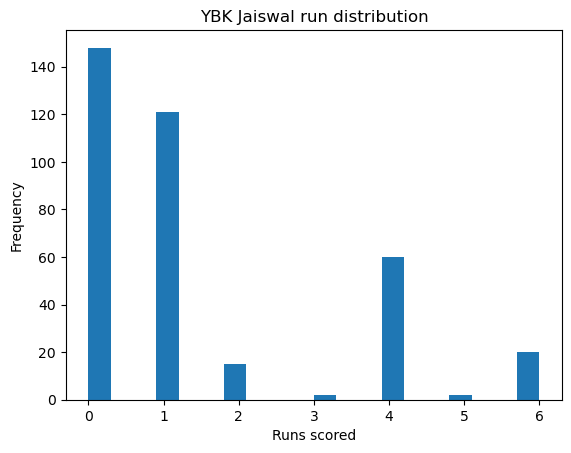

In [141]:
# Create a run distribution histogram
plt.hist(temp['total_run'], bins=20)
plt.xlabel('Runs scored')
plt.ylabel('Frequency')
plt.title('YBK Jaiswal run distribution')
plt.show()

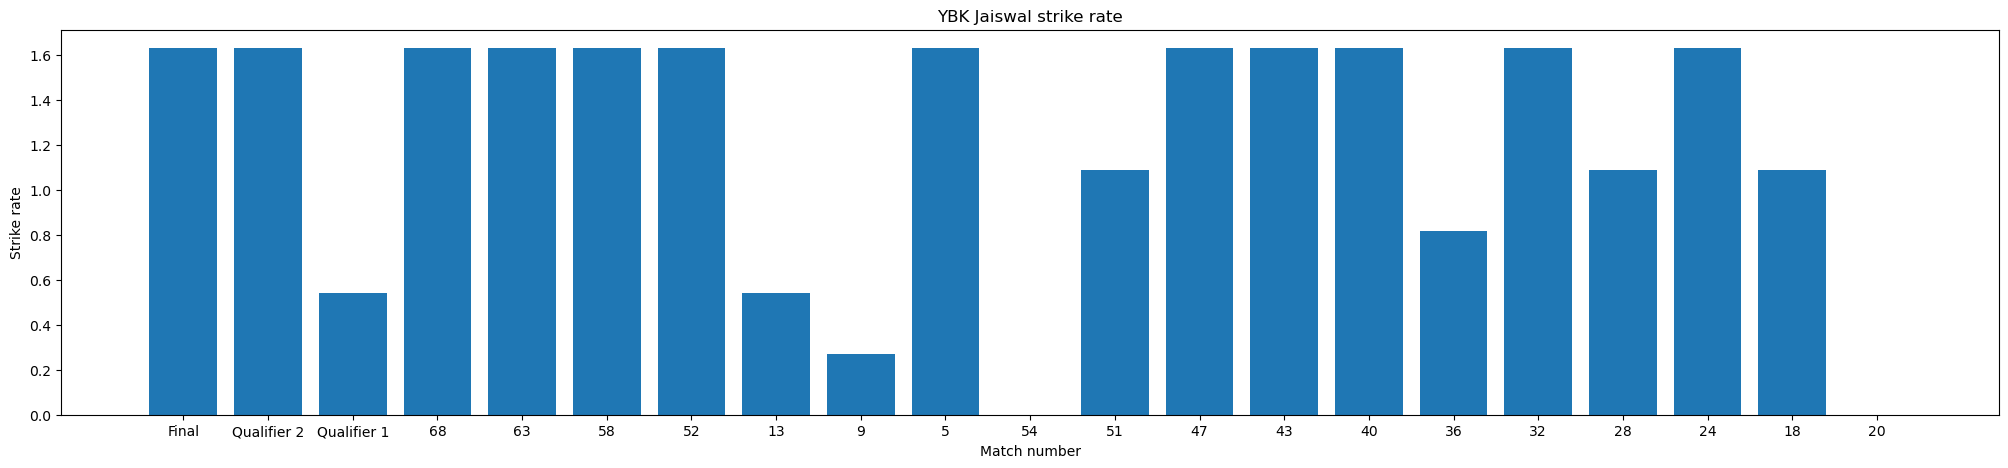

In [151]:
plt.figure(figsize=(25,5))
plt.bar(temp['MatchNumber'], strike_rate1)
plt.xlabel('Match number')
plt.ylabel('Strike rate')
plt.title('YBK Jaiswal strike rate')
plt.show()

JAISWAL IS A NEW BATSMAN OF RAJASTHAN ROYALS WHO HAS JUST PLAYED 2 SEASONS OF IPL

# ANALYZING AD RUSSEL'S PERFORMANCE

In [156]:
temp = df[(df['batter'] == 'AD Russell')]
temp

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,batter,bowler,non-striker,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,BattingTeam
2137,1304112,Navi Mumbai,2022-05-18,2022,66,Lucknow Super Giants,Kolkata Knight Riders,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,bat,...,AD Russell,MP Stoinis,SW Billings,0,0,0,0,0,NaN,Kolkata Knight Riders
2138,1304112,Navi Mumbai,2022-05-18,2022,66,Lucknow Super Giants,Kolkata Knight Riders,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,bat,...,AD Russell,MP Stoinis,SW Billings,1,0,1,0,0,NaN,Kolkata Knight Riders
2139,1304112,Navi Mumbai,2022-05-18,2022,66,Lucknow Super Giants,Kolkata Knight Riders,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,bat,...,AD Russell,Avesh Khan,SW Billings,1,0,1,0,0,NaN,Kolkata Knight Riders
2141,1304112,Navi Mumbai,2022-05-18,2022,66,Lucknow Super Giants,Kolkata Knight Riders,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,bat,...,AD Russell,Avesh Khan,SW Billings,0,0,0,0,0,NaN,Kolkata Knight Riders
2142,1304112,Navi Mumbai,2022-05-18,2022,66,Lucknow Super Giants,Kolkata Knight Riders,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,bat,...,AD Russell,Avesh Khan,SW Billings,0,0,0,0,0,NaN,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139530,548372,Delhi,2012-05-17,2012,67,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Delhi Daredevils,field,...,AD Russell,R Vinay Kumar,P Negi,6,0,6,0,0,NaN,Delhi Daredevils
139531,548372,Delhi,2012-05-17,2012,67,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Delhi Daredevils,field,...,AD Russell,R Vinay Kumar,P Negi,1,0,1,0,0,NaN,Delhi Daredevils
139532,548372,Delhi,2012-05-17,2012,67,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Delhi Daredevils,field,...,AD Russell,P Parameswaran,P Negi,6,0,6,0,0,NaN,Delhi Daredevils
139533,548372,Delhi,2012-05-17,2012,67,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Delhi Daredevils,field,...,AD Russell,P Parameswaran,P Negi,0,0,0,0,0,NaN,Delhi Daredevils


In [168]:
temp['Season'].max()

'2022'

In [158]:
temp['Season'].min()

'2012'

In [159]:
temp['total_run'].sum()

2073

In [160]:
temp['extras_run'].sum()

112

In [161]:
strike_rate = temp['total_run'].sum() / len(temp['total_run']) * 100

strike_rate1 = temp['total_run'] / len(temp['total_run']) * 100
strike_rate

177.48287671232876

In [162]:
temp['player_out'].value_counts()

player_out
AD Russell      61
Shubman Gill     1
Name: count, dtype: int64

# SUMMARY OF HIS PERFORMANCE

In [163]:
# Create a list of data
data = [["AD RUSSEL", 2012, 2022, 2073, 61, 112, 177.4829]]

# Create a table
table = tabulate(data, headers=["Name", "Starting Season", "Latest Season", "Total Runs", "Outs", "Extra Runs", "Strike Rate"],tablefmt="grid")

# Print the table
print(table)

+-----------+-------------------+-----------------+--------------+--------+--------------+---------------+
| Name      |   Starting Season |   Latest Season |   Total Runs |   Outs |   Extra Runs |   Strike Rate |
+===========+===================+=================+==============+========+==============+===============+
| AD RUSSEL |              2012 |            2022 |         2073 |     61 |          112 |       177.483 |
+-----------+-------------------+-----------------+--------------+--------+--------------+---------------+


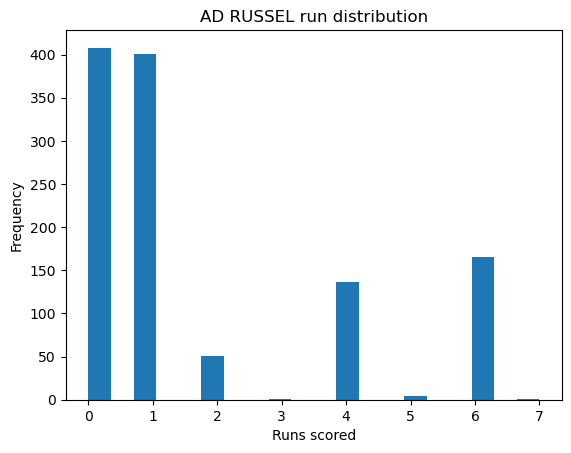

In [166]:
# Create a run distribution histogram
plt.hist(temp['total_run'], bins=20)
plt.xlabel('Runs scored')
plt.ylabel('Frequency')
plt.title('AD RUSSEL run distribution')
plt.show()

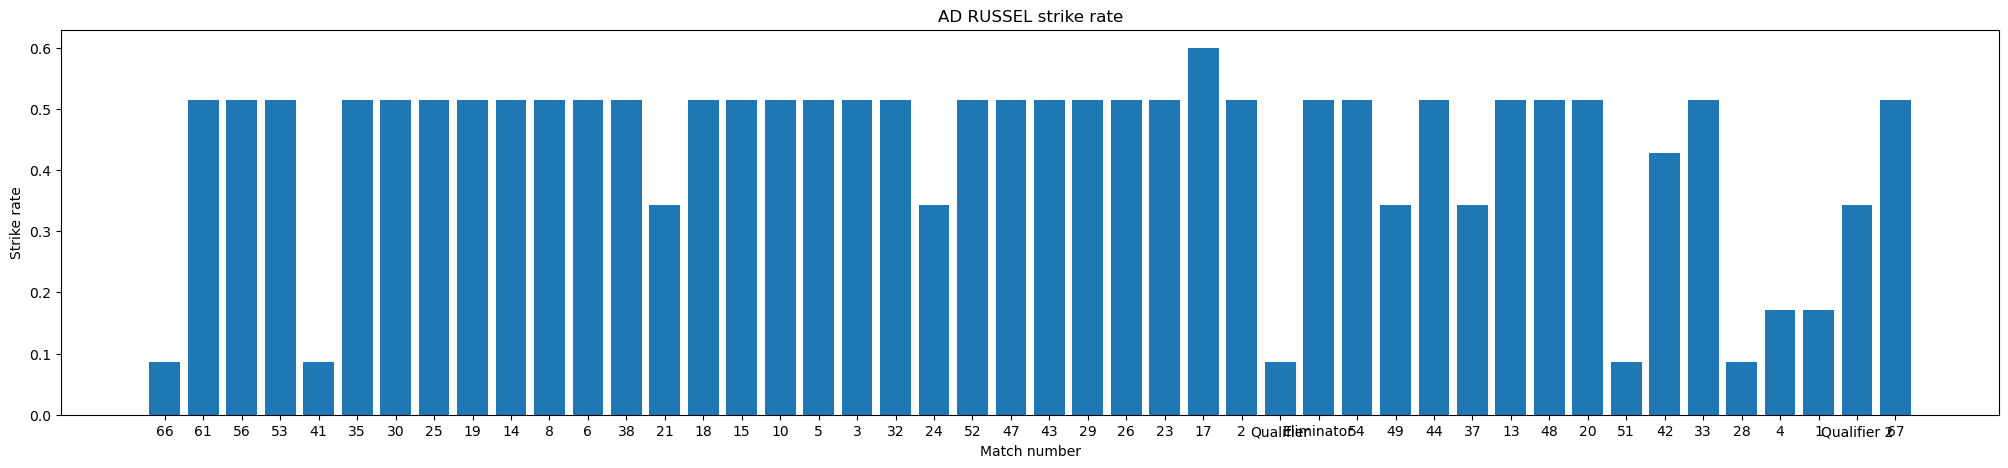

In [167]:
plt.figure(figsize=(25,5))
plt.bar(temp['MatchNumber'], strike_rate1)
plt.xlabel('Match number')
plt.ylabel('Strike rate')
plt.title('AD RUSSEL strike rate')
plt.show()

AD RUSSEL OF ROYAL CHALLENGERS BANGALORE IS AN OLD PLAYER WHO IS AN ALL-ROUNDER AND WITH AN IMPRESSIVE SCORE RECORD. HE ALSO TOOK A WICKET OF SHUBHAM GILL

# ANALYZING RG SHARMA'S PERFORMANCE

In [169]:
temp = df[(df['batter'] == 'RG Sharma')]
temp

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,batter,bowler,non-striker,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,BattingTeam
1329,1304115,Mumbai,2022-05-21,2022,69,Delhi Daredevils,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,...,RG Sharma,KK Ahmed,Ishan Kishan,0,0,0,0,0,NaN,Mumbai Indians
1330,1304115,Mumbai,2022-05-21,2022,69,Delhi Daredevils,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,...,RG Sharma,KK Ahmed,Ishan Kishan,0,0,0,0,0,NaN,Mumbai Indians
1337,1304115,Mumbai,2022-05-21,2022,69,Delhi Daredevils,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,...,RG Sharma,KK Ahmed,Ishan Kishan,0,0,0,0,0,NaN,Mumbai Indians
1338,1304115,Mumbai,2022-05-21,2022,69,Delhi Daredevils,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,...,RG Sharma,KK Ahmed,Ishan Kishan,0,0,0,0,0,NaN,Mumbai Indians
1339,1304115,Mumbai,2022-05-21,2022,69,Delhi Daredevils,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,...,RG Sharma,KK Ahmed,Ishan Kishan,0,0,0,0,0,NaN,Mumbai Indians
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211669,335988,Hyderabad,2008-04-22,2008,7,Deccan Chargers,Delhi Daredevils,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,bat,...,RG Sharma,MF Maharoof,AS Yadav,2,0,2,0,0,NaN,Deccan Chargers
211673,335988,Hyderabad,2008-04-22,2008,7,Deccan Chargers,Delhi Daredevils,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,bat,...,RG Sharma,R Bhatia,AS Yadav,0,0,0,0,1,RG Sharma,Deccan Chargers
212060,335986,Kolkata,2008-04-20,2008,4,Kolkata Knight Riders,Deccan Chargers,"Eden Gardens, Kolkata",Deccan Chargers,bat,...,RG Sharma,M Kartik,A Symonds,0,0,0,0,0,NaN,Deccan Chargers
212061,335986,Kolkata,2008-04-20,2008,4,Kolkata Knight Riders,Deccan Chargers,"Eden Gardens, Kolkata",Deccan Chargers,bat,...,RG Sharma,M Kartik,A Symonds,0,0,0,0,0,NaN,Deccan Chargers


In [170]:
temp['Season'].max()

'2022'

In [171]:
temp['Season'].min()

'2008'

In [172]:
temp['total_run'].sum()

5929

In [173]:
temp['extras_run'].sum()

202

In [174]:
strike_rate = temp['total_run'].sum() / len(temp['total_run']) * 100

strike_rate1 = temp['total_run'] / len(temp['total_run']) * 100
strike_rate

131.96082795459603

In [175]:
temp['player_out'].value_counts()

player_out
RG Sharma        182
SA Yadav           2
KH Pandya          2
A Symonds          2
KA Pollard         1
MEK Hussey         1
MD Mishra          1
Harmeet Singh      1
Name: count, dtype: int64

# SUMMARY OF HIS PERFORMANCE

In [176]:
# Create a list of data
data = [["RG SHARMA", 2008, 2022, 5929, 202, 182, 131.9608]]

# Create a table
table = tabulate(data, headers=["Name", "Starting Season", "Latest Season", "Total Runs", "Outs", "Extra Runs", "Strike Rate"],tablefmt="grid")

# Print the table
print(table)

+-----------+-------------------+-----------------+--------------+--------+--------------+---------------+
| Name      |   Starting Season |   Latest Season |   Total Runs |   Outs |   Extra Runs |   Strike Rate |
+===========+===================+=================+==============+========+==============+===============+
| RG SHARMA |              2008 |            2022 |         5929 |    202 |          182 |       131.961 |
+-----------+-------------------+-----------------+--------------+--------+--------------+---------------+


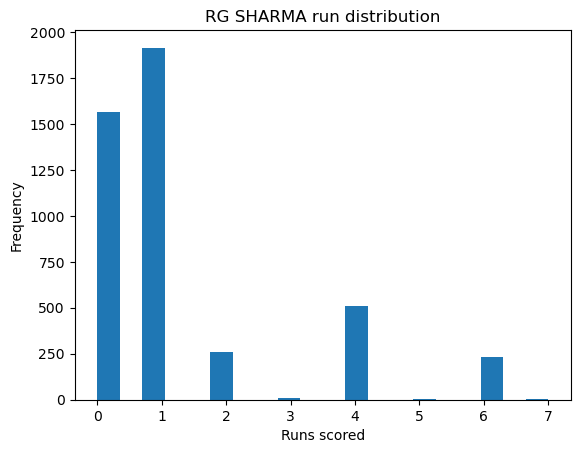

In [177]:
# Create a run distribution histogram
plt.hist(temp['total_run'], bins=20)
plt.xlabel('Runs scored')
plt.ylabel('Frequency')
plt.title('RG SHARMA run distribution')
plt.show()

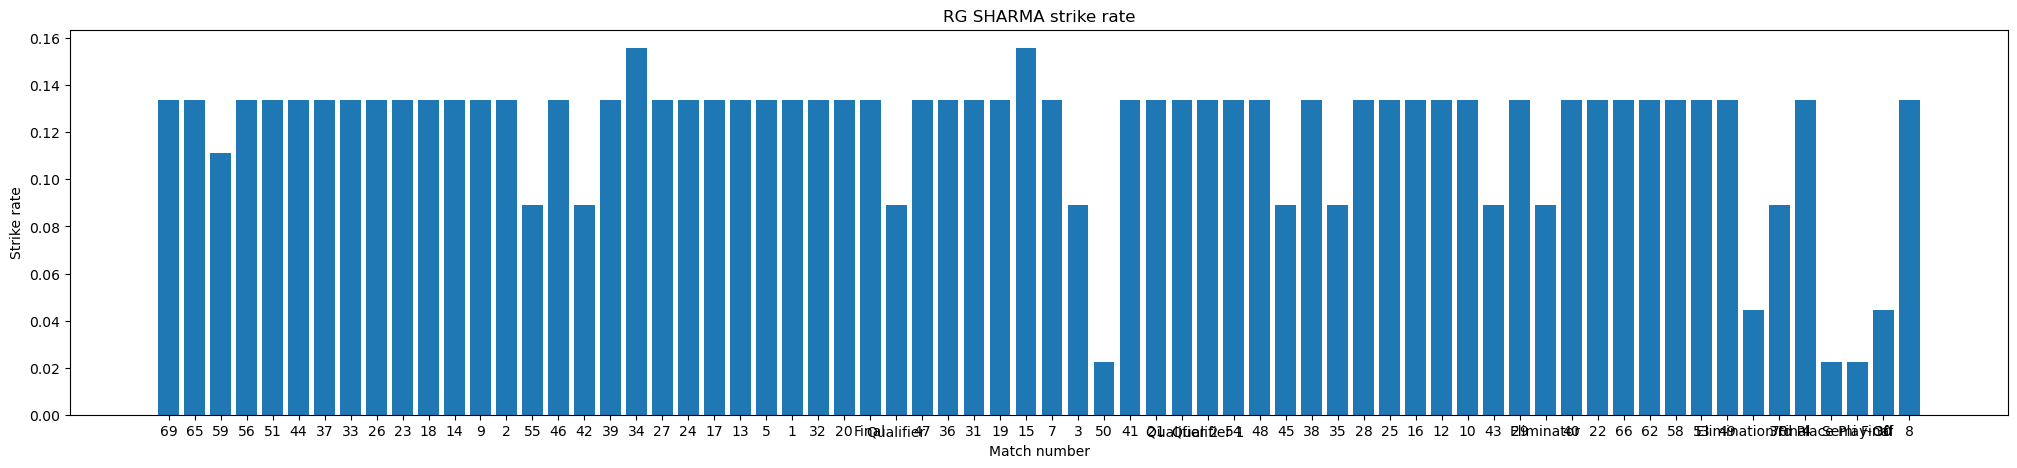

In [180]:
plt.figure(figsize=(25,5))
plt.bar(temp['MatchNumber'], strike_rate1)
plt.xlabel('Match number')
plt.ylabel('Strike rate')
plt.title('RG SHARMA strike rate')
plt.show()

RG SHARMA HAS BEEN ONE OF THE TOP 10 BATSMEN IN THE IPL SERIES. HE IS AN ALL-ROUNDER WITH AN IMPRESSIVE SCORE AND HAS ALSO TAKEN  10 WICKETS